In [1]:
#importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
#opening the new csv file for our data
df = pd.read_csv('Clean_AviationIII.csv')

**Is there any correlation between weather and accidents?
Weather that produces most accidents**

  Compare with damage
    
    #Aircraft_damage

    
  Compare with injuries
    
	#Total_Fatal_Injuries
	#Total_Serious_Injuries
	#Total_Minor_Injuries
	#Total_Uninjured
    
    #Injury_severity

In [3]:
df.columns

Index(['Event_Id', 'Accident_Number', 'Event_Date', 'Location', 'Country',
       'Injury_Severity', 'Aircraft_Damage', 'Aircraft_Category', 'Make',
       'Model', 'Number_of_Engines', 'Engine_Type', 'Purpose_of_flight',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Phase_of_Flight', 'Make_Model', 'Total_Injuries', 'Total_Passengers',
       'created_year'],
      dtype='object')

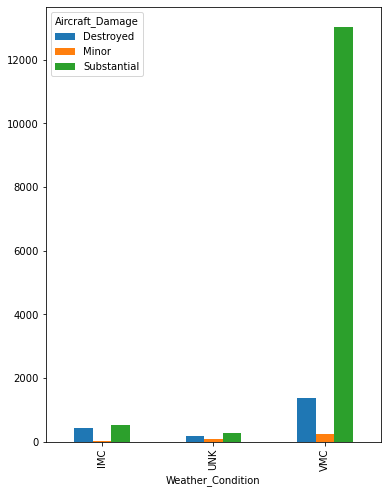

In [4]:
Weather_v_Damage = df[['Weather_Condition', 'Aircraft_Damage']]

Weather_v_Damage_count = Weather_v_Damage.value_counts()
Weather_v_Damage_count = Weather_v_Damage_count.unstack(level = 1)

Weather_v_Damage_count.plot(kind='bar', figsize=(6,8),use_index = True)

new_col = df['Weather_Condition'].value_counts().values
Weather_v_Injuries = df.groupby('Weather_Condition')[['Total_Injuries', 'Total_Uninjured']].sum()
Weather_v_Injuries['Number_of_Accidents'] = new_col
Weather_v_Injuries['Injuries_per_Accident'] = Weather_v_Injuries['Total_Injuries'] / Weather_v_Injuries['Number_of_Accidents']
Weather_v_Injuries['Uninjuried_per_Accident'] = Weather_v_Injuries['Total_Uninjured'] / Weather_v_Injuries['Number_of_Accidents']

Weather_Injuries = Weather_v_Injuries[['Total_Injuries', 'Total_Uninjured']]
Weather_rate = Weather_v_Injuries[['Injuries_per_Accident','Uninjuried_per_Accident']].reset_index()

<AxesSubplot:xlabel='Weather_Condition'>

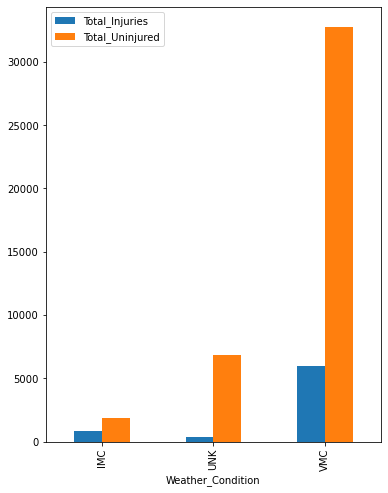

In [5]:
Weather_Injuries.plot(kind='bar', figsize=(6,8),use_index = True)

**Is there a correlation between engine type and accidents? Do accidents decrease with a certain engine type?**
	
    -Engine Type

	#Amateur_Built     - maybe drop ? filtering commercial, private,          
	#Number_of_Engines          
	#Engine_Type  


<AxesSubplot:xlabel='Engine_Type'>

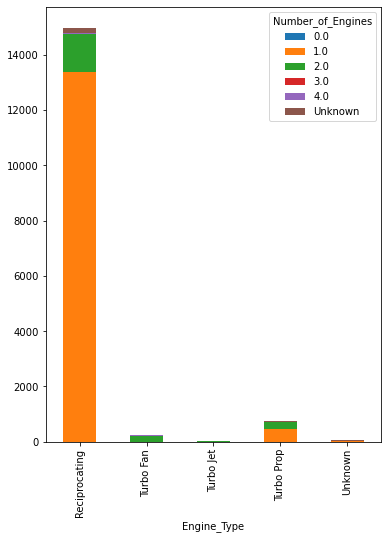

In [6]:
Engines = df.groupby(['Number_of_Engines', 'Engine_Type']).size().unstack(level = 0, fill_value = 0)
Engines.plot(kind='bar', stacked=True, figsize=(6,8), use_index = True)

In [7]:
top_makes = df['Make'].value_counts()[:20]

make_df = df[df['Make'].isin(top_makes.index)][['Make', 'Total_Injuries', 'Total_Passengers']]

make_df = df.groupby(['Make','Engine_Type'])[ 'Total_Injuries', 'Total_Passengers'].sum().nlargest(20, columns=['Total_Injuries', 'Total_Passengers'])

make_df['Injury_Rate'] = (make_df['Total_Injuries']/ make_df['Total_Passengers'])
make_df = make_df.drop(columns= ['Total_Injuries', 'Total_Passengers'])
make_df = make_df.unstack(fill_value=0)
make_df

<ipython-input-7-aec84bc5b530>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  make_df = df.groupby(['Make','Engine_Type'])[ 'Total_Injuries', 'Total_Passengers'].sum().nlargest(20, columns=['Total_Injuries', 'Total_Passengers'])


Injury_Rate                               
Engine_Type        Reciprocating Turbo Fan   Unknown Turbo Prop
Make                                                           
Cessna                  0.198546   0.00000  0.000000   0.147513
Piper                   0.202326   0.00000  0.000000   0.000000
Boeing                  0.222222   0.03042  0.228139   0.000000
Beech                   0.194618   0.00000  0.000000   0.087896
Mooney                  0.250364   0.00000  0.000000   0.000000
Grumman                 0.305195   0.00000  0.000000   0.000000
Aeronca                 0.287540   0.00000  0.000000   0.000000
Bellanca                0.208437   0.00000  0.000000   0.000000
Cirrus design corp      0.217033   0.00000  0.000000   0.000000
Stinson                 0.301653   0.00000  0.000000   0.000000
Luscombe                0.316279   0.00000  0.000000   0.000000
Air tractor             0.000000   0.00000  0.000000   0.222591
Champion                0.242915   0.00000  0.000000   0.000000
Taylorcraft             0.327044   0.00000  0.000000   0.000000
Maule                   0.136111   0.00000  0.000000   0.000000
Cirrus                  0.214286   0.00000  0.000000   0.000000

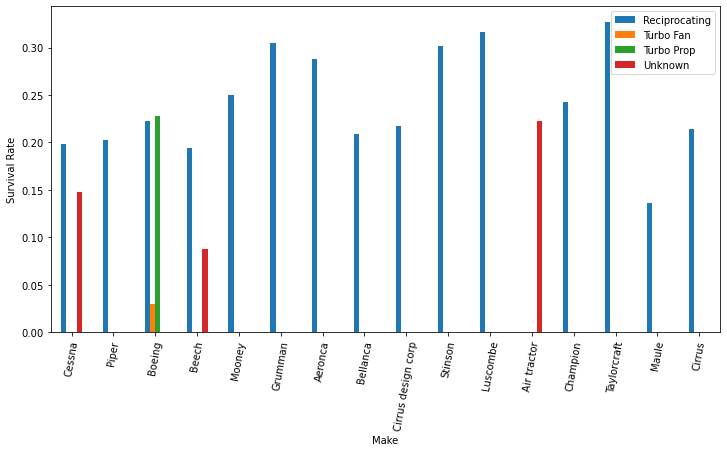

In [8]:
fig, ax = plt.subplots()

make_df.plot(kind='bar', rot=80, figsize=(12,6), ax =ax)
ax.legend(['Reciprocating',
'Turbo Fan',
'Turbo Prop',
'Unknown'])
ax.set_ylabel('Survival Rate');

In [9]:
df[['Make_Model','Engine_Type']].value_counts()[:20]

Make_Model               Engine_Type  
Cessna 172               Reciprocating    739
Cessna 152               Reciprocating    412
Cessna 172N              Reciprocating    298
Cessna 182               Reciprocating    285
Cessna 172S              Reciprocating    253
Cessna 180               Reciprocating    227
Piper PA28               Reciprocating    222
Cessna 150               Reciprocating    216
Piper PA-28-140          Reciprocating    200
Cessna 172M              Reciprocating    198
Piper PA-18-150          Reciprocating    188
Cessna 172P              Reciprocating    157
Beech A36                Reciprocating    148
Piper PA-28-161          Reciprocating    132
Cessna 140               Reciprocating    120
Piper PA-28-180          Reciprocating    120
Cirrus design corp SR22  Reciprocating    118
Cessna 170B              Reciprocating    116
Piper PA-28-181          Reciprocating    106
Piper PA-18              Reciprocating    104
dtype: int64

Most of the top crashes are related with a planes with reciprocating engine. Only the model Bell 206B has a turbo shaft engine

In [10]:
top_models = df[['Make_Model']].value_counts()[:20]

model_df = df[df['Make_Model'].isin(top_models.index)][['Make', 'Total_Injuries', 'Total_Passengers']]
model_df

model_df = make_df = df.groupby(['Make_Model'])[ 'Total_Injuries', 'Total_Passengers'].sum().nlargest(20, 
    columns=['Total_Injuries', 'Total_Passengers'])
model_df

model_df['Injury_Rate'] = (model_df['Total_Injuries']/ model_df['Total_Passengers'])
model_df = model_df.drop(columns= ['Total_Injuries', 'Total_Passengers'])
model_df

<ipython-input-10-82e886178916>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  model_df = make_df = df.groupby(['Make_Model'])[ 'Total_Injuries', 'Total_Passengers'].sum().nlargest(20,


,Injury_Rate
Make_Model,
Boeing 747-2B6B,1.000000
Cessna 172,0.196333
Boeing 777-200ER,0.609121
Boeing 737 7H4,0.225962
Cessna 182,0.218430
Piper PA-28-140,0.310526
Cessna 172N,0.194296
Piper PA28,0.245658
Boeing 767,0.052907


<ipython-input-11-325016df34e4>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(model_df.index, rotation=80)


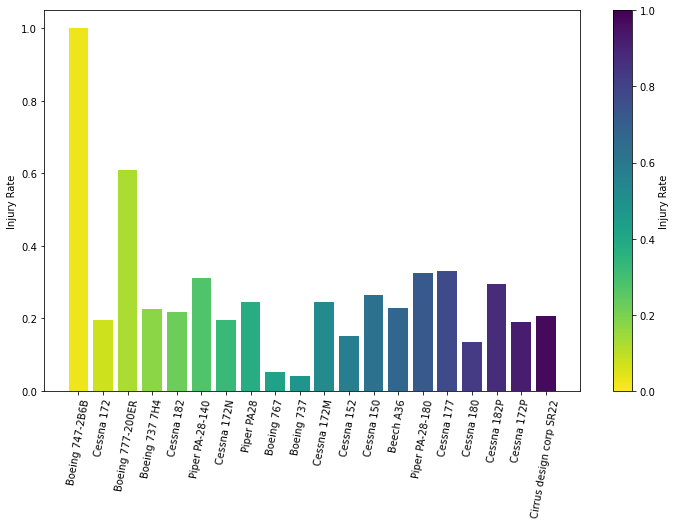

In [11]:
fig, ax = plt.subplots(figsize=(12,7))

color_map = plt.cm.viridis_r
bin_edges = np.linspace(0,1, len(model_df) + 1)
colors = [color_map((bin_edges[i] + bin_edges[i+1])/2) for i in range(len(model_df))]

# model_df.plot(kind='bar', rot=80, figsize=(12,6), ax =ax,legend=False, color =colors)
# ax.set_ylabel('Survival Rate');

for index, (make, row) in enumerate(model_df.iterrows()):
    color = colors[index]
    ax.bar(make, row['Injury_Rate'], color = color)

ax.set_xticklabels(model_df.index, rotation=80)
ax.set_ylabel('Injury Rate')
sm = plt.cm.ScalarMappable(cmap = color_map, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Injury Rate')

In [12]:
df.columns

Index(['Event_Id', 'Accident_Number', 'Event_Date', 'Location', 'Country',
       'Injury_Severity', 'Aircraft_Damage', 'Aircraft_Category', 'Make',
       'Model', 'Number_of_Engines', 'Engine_Type', 'Purpose_of_flight',
       'Total_Fatal_Injuries', 'Total_Serious_Injuries',
       'Total_Minor_Injuries', 'Total_Uninjured', 'Weather_Condition',
       'Phase_of_Flight', 'Make_Model', 'Total_Injuries', 'Total_Passengers',
       'created_year'],
      dtype='object')

In [27]:
top_20 = df['Make'].value_counts()
Make_Rates = df[df['Make'].isin(top_20.index)][['Make', 'Total_Fatal_Injuries','Total_Injuries', 'Total_Passengers', 'Aircraft_Damage']]
Make_Rates = df.groupby(['Make'])[['Total_Injuries', 'Total_Fatal_Injuries','Total_Passengers']].sum().nlargest(20, columns=['Total_Injuries', 'Total_Passengers'])
Make_Rates['Injury_Rate'] = Make_Rates['Total_Injuries']/Make_Rates['Total_Passengers']
Make_Rates['Fatality_Rate'] = Make_Rates['Total_Fatal_Injuries']/Make_Rates['Total_Passengers']
Make_Rates['Survival_Rate'] = 1- Make_Rates['Injury_Rate'] - Make_Rates['Fatality_Rate']
Make_Rates

Make_damage_list = df[df['Make'].isin(top_20.index)][['Make', 'Aircraft_Damage']]
Make_damage_df = Make_damage_list.groupby(['Make','Aircraft_Damage']).size().to_frame(None)
Make_damage_sum = Make_damage_df.groupby(level='Make').sum()

Make_normalized_damage_df = Make_damage_df.div(Make_damage_sum, level='Make')
Make_normalized_damage_df = Make_normalized_damage_df.unstack(level=1, fill_value = 0)
Make_normalized_damage_df

Make_safety_score_df = Make_Rates.merge(Make_normalized_damage_df, left_index=True, right_index=True);

Make_safety_score_df.rename(columns = {
    (0, 'Destroyed') : 'Destroyed_Rate',
    (0, 'Minor'): 'Minor_Rate',
    (0, 'Substantial'): 'Substantial_Rate'
}, inplace= True)

Make_safety_score_df.drop(Make_safety_score_df.columns[0:3],axis =1,inplace= True)

Make_safety_score_df['Safety_Score'] = (
    10 * Make_safety_score_df['Fatality_Rate'] + 30 * Make_safety_score_df['Injury_Rate'] +  60 * Make_safety_score_df['Survival_Rate'] +
    10 * Make_safety_score_df['Destroyed_Rate'] + 30 * Make_safety_score_df['Substantial_Rate']+ 60 * Make_safety_score_df['Minor_Rate'])

Make_safety_score_df.sort_values(by=['Safety_Score'], ascending=False)

C:\Users\irwin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,Injury_Rate,Fatality_Rate,Survival_Rate,Destroyed_Rate,Minor_Rate,Substantial_Rate,Safety_Score
Make,,,,,,,
Boeing,0.046623,0.038690,0.914687,0.073529,0.352941,0.573529,95.784449
Maule,0.140110,0.101648,0.758242,0.055300,0.004608,0.940092,79.746544
Stinson,0.301653,0.061983,0.636364,0.050725,0.000000,0.949275,76.836747
Taylorcraft,0.322981,0.080745,0.596273,0.057692,0.028846,0.913462,75.984830
Aeronca,0.287540,0.102236,0.610224,0.068293,0.019512,0.912195,75.481493
Luscombe,0.316279,0.083721,0.600000,0.059211,0.000000,0.940789,75.141371
Cessna,0.193369,0.146698,0.659933,0.107499,0.010656,0.881845,75.033708
Champion,0.242915,0.121457,0.635628,0.101266,0.000000,0.898734,74.614360
Bellanca,0.208437,0.151365,0.640199,0.100746,0.011194,0.888060,74.499556


safety score

I = injury rate
F = fatality rate
D = damage
    Destroyed - 3
    Substantial - 2
    Minor - 1



In [29]:
top_20 = df['Make_Model'].value_counts()
Model_Rates = df[df['Make_Model'].isin(top_20.index)][['Make_Model', 'Total_Fatal_Injuries','Total_Injuries', 'Total_Passengers', 'Aircraft_Damage']]
Model_Rates = df.groupby(['Make_Model'])[['Total_Injuries', 'Total_Fatal_Injuries','Total_Passengers']].sum().nlargest(60, columns=['Total_Injuries', 'Total_Passengers'])
Model_Rates['Injury_Rate'] = Model_Rates['Total_Injuries']/Model_Rates['Total_Passengers']
Model_Rates['Fatality_Rate'] = Model_Rates['Total_Fatal_Injuries']/Model_Rates['Total_Passengers']
Model_Rates['Survival_Rate'] = 1- Model_Rates['Injury_Rate'] - Model_Rates['Fatality_Rate']
Model_Rates

Model_damage_list = df[df['Make_Model'].isin(top_20.index)][['Make_Model', 'Aircraft_Damage']]
Model_damage_df = Model_damage_list.groupby(['Make_Model','Aircraft_Damage']).size().to_frame(None)
Model_damage_sum = Model_damage_df.groupby(level='Make_Model').sum()

Model_normalized_damage_df = Model_damage_df.div(Model_damage_sum, level='Make_Model')
Model_normalized_damage_df = Model_normalized_damage_df.unstack(level=1, fill_value = 0)
Model_normalized_damage_df

Model_safety_score_df = Model_Rates.merge(Model_normalized_damage_df, left_index=True, right_index=True);

Model_safety_score_df.rename(columns = {
    (0, 'Destroyed') : 'Destroyed_Rate',
    (0, 'Minor'): 'Minor_Rate',
    (0, 'Substantial'): 'Substantial_Rate'
}, inplace= True)

Model_safety_score_df.drop(Model_safety_score_df.columns[0:3],axis =1,inplace= True)

Model_safety_score_df['Safety_Score'] = (
    10 * Model_safety_score_df['Fatality_Rate'] + 30 * Model_safety_score_df['Injury_Rate'] +  60 * Model_safety_score_df['Survival_Rate'] +
    10 * Model_safety_score_df['Destroyed_Rate'] + 30 * Model_safety_score_df['Substantial_Rate']+ 60 * Model_safety_score_df['Minor_Rate'])

Model_safety_score_df.sort_values(by=['Safety_Score'], ascending=False)

C:\Users\irwin\anaconda3\envs\learn-env\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


,Injury_Rate,Fatality_Rate,Survival_Rate,Destroyed_Rate,Minor_Rate,Substantial_Rate,Safety_Score
Make_Model,,,,,,,
Boeing 747,0.020701,0.000000,0.979299,0.000000,0.818182,0.181818,113.924435
Boeing 737-291,0.244444,0.000000,0.755556,0.000000,1.000000,0.000000,112.666667
Boeing 737,0.040179,0.050446,0.909375,0.045455,0.363636,0.590909,96.272321
Boeing 737 7H4,0.225962,0.001603,0.772436,0.000000,0.333333,0.666667,93.141026
Boeing 767,0.052907,0.074419,0.872674,0.187500,0.312500,0.500000,90.316860
Boeing 747-2B6B,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,90.000000
Boeing 737-300,0.120301,0.087719,0.791980,0.400000,0.400000,0.200000,86.005013
Cessna 180,0.135266,0.048309,0.816425,0.035242,0.000000,0.964758,82.821724
Piper PA-18-150,0.163043,0.065217,0.771739,0.021277,0.000000,0.978723,81.422294
